In [1]:
import pandas as pd 
import numpy as np
import os 
import seaborn as sns 
import matplotlib.pyplot as plt 

## Set input and output folders 

In [2]:
# analysis folder version  
analysis_version = '010'

In [3]:
out_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis',
                        analysis_version, 
                        '001_histograms_counts')

if not os.path.exists(out_path): 
    os.makedirs(out_path)

### Load Clean Data - no missing BW Data 
May be missing video data 

In [4]:
# PWS 
zv_pws_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                    '000_merged_cleaned_data\zv_bw_merged_gait_vertical_PWS_1_clean.csv')

zv_pws_bw_clean_df = pd.read_csv(zv_pws_bw_clean_path, index_col = 0)

# FW 
zv_fw_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                    analysis_version, 
                                   '000_merged_cleaned_data\zv_bw_merged_gait_vertical_FW_1_clean.csv') 
zv_fw_bw_clean_df = pd.read_csv(zv_fw_bw_clean_path, index_col = 0) 

# Home Videos 
hv_bw_clean_path = os.path.join(r'C:\Users\mmccu\Box\MM_Personal\5_Projects\BoveLab\3_Data_and_Code\gait_bw_zeno_home_analysis', 
                                analysis_version, 
                                '000_merged_cleaned_data\hv_bw_merged_clean.csv') 

hv_bw_clean_df = pd.read_csv(hv_bw_clean_path, index_col = 0) 

## Function - count number of non-missing values in each column and plot histogram 

In [5]:
def hist_and_shapiro(df, out_path, task_subfolder): 
    
    column_counts = [] # save number of non-missing values in each row 
    
    histogram_folder = os.path.join(out_path, 'histograms', task_subfolder)
    if not os.path.exists(histogram_folder):
        os.makedirs(histogram_folder)
    
    for column in df.columns:
        # count number of non missing columns 
        column_counts.append({'column_name' : column, 
                               'non_missing_rows' : df[column].count()})

        # histogram of numeric values 
        if ((df[column].dtype == 'float64') or (df[column].dtype == 'int64')) and (column != 'EDSS_same_before_after_MM'):
            # histogram 
            plt.figure(figsize=(8, 6))
            plt.hist(df[column], bins = 30, color='skyblue', edgecolor='black')
            plt.suptitle(task_subfolder) 
            plt.title(f'Histogram of {column}')
            plt.xlabel(column)
            plt.ylabel('Frequency')
            plt.savefig(os.path.join(histogram_folder, f'{column}.png'))
            plt.close()

    column_counts_df = pd.DataFrame(column_counts) 

    return column_counts_df

### Run histogram and counting functions 

C:\Users\mmccu\venv_home_video_analysis_2\lib\site-packages\matplotlib\axes\_axes.py:6973: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
C:\Users\mmccu\venv_home_video_analysis_2\lib\site-packages\matplotlib\axes\_axes.py:6974: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: autodetected range of [nan, nan] is not finite

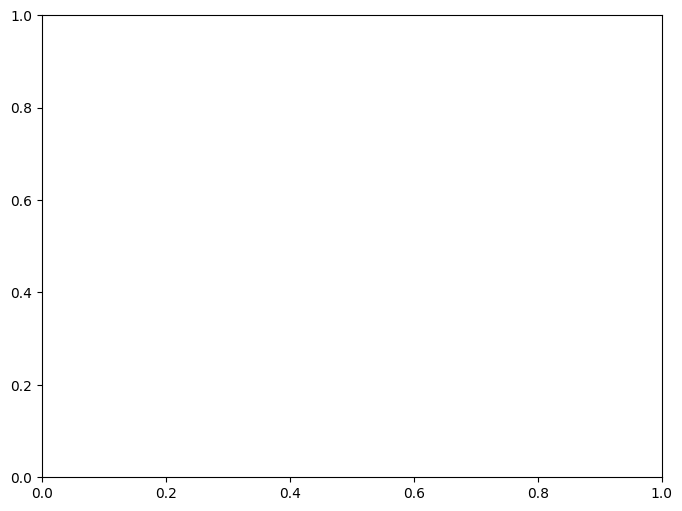

In [6]:
# PWS 
zv_pws_bw_counts = hist_and_shapiro(zv_pws_bw_clean_df, out_path, 'zeno_pws')
zv_pws_bw_counts.to_csv(os.path.join(out_path, 'zeno_pws_column_counts.csv')) 

In [ ]:
# FW 
zv_fw_bw_counts = hist_and_shapiro(zv_fw_bw_clean_df, out_path, 'zeno_fw')
zv_fw_bw_counts.to_csv(os.path.join(out_path, 'zeno_fw_column_counts.csv'))

In [ ]:
# Home Videos  
hv_bw_counts = hist_and_shapiro(hv_bw_clean_df, out_path, 'home')
hv_bw_counts.to_csv(os.path.join(out_path, 'home_column_counts.csv'))

### Number of unique IDs 

In [7]:
unique_ids_df = pd.DataFrame(data = {"PWS" : [zv_pws_bw_clean_df['id_video'].nunique()], 
                                     "FW" : [zv_fw_bw_clean_df['id_video'].nunique()], 
                                     "Home" : [hv_bw_clean_df['id_video'].nunique()]}) 
unique_ids_df.to_csv(os.path.join(out_path, 'all_unique_id_counts.csv'))
unique_ids_df

,PWS,FW,Home
0,153,152,38


## Check - are all participants in FW and PWS the same? 

In [8]:
# merge id_date_pose_zv variable (date and id of video) 
fw_pws_id_date_pose_zv = pd.concat([zv_pws_bw_clean_df[['bw_id', 'task_pose_zv']], zv_fw_bw_clean_df[['bw_id', 'task_pose_zv']]])

# check for unique variables - have pws video but no fw or vice versa 
fw_pws_id_date_pose_zv[~fw_pws_id_date_pose_zv['bw_id'].duplicated(keep = False)]

# think they are the same participants, just maybe a few with different follow up videos 

,bw_id,task_pose_zv
132,BW-0133,gait_vertical_PWS_1


## Dates 

In [9]:
# PWS 
zv_pws_bw_clean_df['visit_date'] = pd.to_datetime(zv_pws_bw_clean_df['visit_date'], errors = 'coerce') 

print(zv_pws_bw_clean_df['visit_date'].min())
print(zv_pws_bw_clean_df['visit_date'].max())

2022-09-12 00:00:00
2024-10-03 00:00:00


In [10]:
# FW 
zv_fw_bw_clean_df['visit_date'] = pd.to_datetime(zv_fw_bw_clean_df['visit_date'], errors = 'coerce')

print(zv_pws_bw_clean_df['visit_date'].min())
print(zv_pws_bw_clean_df['visit_date'].max())

2022-09-12 00:00:00
2024-10-03 00:00:00


In [11]:
# HOme 
print(hv_bw_clean_df['visit_date_video'].min())
print(hv_bw_clean_df['visit_date_video'].max())

2023-05-05
2025-04-24


### Breakdown by REDCap visit type 

In [12]:
# PWS Videos 
pws_visit_types = pd.DataFrame(zv_pws_bw_clean_df['redcap_event_name'].value_counts())
pws_visit_types.to_csv(os.path.join(out_path, 'zeno_pws_redcap_event_counts.csv')) 

# FW Videos 
fw_visit_types = pd.DataFrame(zv_fw_bw_clean_df['redcap_event_name'].value_counts())
fw_visit_types.to_csv(os.path.join(out_path, 'zeno_fw_redcap_event_counts.csv')) 

# Home Videos  
home_visit_types = pd.DataFrame(hv_bw_clean_df['redcap_event_name'].value_counts())
home_visit_types.to_csv(os.path.join(out_path, 'home_redcap_event_counts.csv')) 

In [13]:
pws_visit_types

,count
redcap_event_name,
Brainwalk: Baseline visit (Arm 1: Baseline visit),141
Year 2 Visit (Arm 1: Baseline visit),79
Year 3 Visit (Arm 1: Baseline visit),9
Year 4 Visit (Arm 1: Baseline visit),1


In [14]:
fw_visit_types

,count
redcap_event_name,
Brainwalk: Baseline visit (Arm 1: Baseline visit),143
Year 2 Visit (Arm 1: Baseline visit),75
Year 3 Visit (Arm 1: Baseline visit),9
Year 4 Visit (Arm 1: Baseline visit),1


In [15]:
home_visit_types

,count
redcap_event_name,
Brainwalk: Baseline visit (Arm 1: Baseline visit),48
Year 2 Visit (Arm 1: Baseline visit),27
Year 3 Visit (Arm 1: Baseline visit),4
Baseline (Arm 6: EPIC),2


### IDs with Multiple vs Single visits 

In [16]:
# home videos 
# get unique id and date combos - remove right and left duplicate 
hv_unique_vid_date_df = hv_bw_clean_df[['id_video', 'visit_date_video']].drop_duplicates()
hv_unique_vid_date_df.head() 

,id_video,visit_date_video
0,BW-0018,2023-10-24
2,BW-0023,2023-05-05
4,BW-0023,2023-10-23
6,BW-0025,2023-11-28
8,BW-0045,2024-01-17


In [17]:
# merge all into single data frame 
single_vs_mult_visits_df = pd.DataFrame(data = {"PWS_single_visit" : [(zv_pws_bw_clean_df['id_video'].value_counts() == 1).sum()],
                                                "PWS_multiple_visits" : [zv_pws_bw_clean_df['id_video'][zv_pws_bw_clean_df['id_video'].duplicated()].nunique()],
                                                "FW_single_visit" : [(zv_fw_bw_clean_df['id_video'].value_counts() == 1).sum()], 
                                                "FW_multiple_visits" : [zv_fw_bw_clean_df['id_video'][zv_fw_bw_clean_df['id_video'].duplicated()].nunique()], 
                                                "Home_single_visit" : [(hv_unique_vid_date_df['id_video'].value_counts() == 1).sum()],
                                                "Home_multiple_visits" : [hv_unique_vid_date_df['id_video'][hv_unique_vid_date_df['id_video'].duplicated()].nunique()]})
single_vs_mult_visits_df.to_csv(os.path.join(out_path, 'single_vs_multiple_visits.csv'))
single_vs_mult_visits_df

,PWS_single_visit,PWS_multiple_visits,FW_single_visit,FW_multiple_visits,Home_single_visit,Home_multiple_visits
0,82,71,82,70,33,5


### Home videos - # of right vs left 

In [18]:
home_rightleft_df = pd.DataFrame(hv_bw_clean_df['task_pose_hv'].value_counts())
home_rightleft_df.to_csv(os.path.join(out_path, 'home_right_left_counts.csv'))
home_rightleft_df

,count
task_pose_hv,
gait_vertical_right,40
gait_vertical_left,39
gait_vertical_left_2,1
gait_vertical_right_2,1


In [19]:
## Home Videos - # of right and left with segment identified 
home_rightleft_w_walking_identified = pd.DataFrame(hv_bw_clean_df['task_pose_hv'].loc[hv_bw_clean_df['walking_segmets_n_pose_hv'] > 0].value_counts())
home_rightleft_w_walking_identified.to_csv(os.path.join(out_path, 'home_right_left_with_walking_identified.csv'))
home_rightleft_w_walking_identified

,count
task_pose_hv,
gait_vertical_right,37
gait_vertical_left,33
gait_vertical_left_2,1
gait_vertical_right_2,1


## In-person videos: videos before and after changing collection protocol 
 use taller camera height, close blinds if sunny, etc 
 3/13/2024 - protocol changed 

In [20]:
protocol_change_date = pd.to_datetime("2024-03-13 00:00:00")
protocol_change_date

# PWS videos 
# before instruction change 
zv_pws_bw_clean_df_1 = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['visit_date'] < protocol_change_date]
print(f"Number videos before changing instructions: {len(zv_pws_bw_clean_df_1)}")
total_1_videos = zv_pws_bw_clean_df_1['id_date_pose_zv'].count()
wWalking_1_videos = zv_pws_bw_clean_df_1['id_date_pose_zv'].loc[zv_pws_bw_clean_df_1['walking_segmets_n_pose_zv'] > 0].count()
percent_wWalking_1 = round((wWalking_1_videos / total_1_videos) * 100, 0)
                           
# After instruction change 
zv_pws_bw_clean_df_2 = zv_pws_bw_clean_df.loc[zv_pws_bw_clean_df['visit_date'] > protocol_change_date]
print(f"Number videos after changing instructions: {len(zv_pws_bw_clean_df_2)}")
total_2_videos = zv_pws_bw_clean_df_2['id_date_pose_zv'].count()
wWalking_2_videos = zv_pws_bw_clean_df_2['id_date_pose_zv'].loc[zv_pws_bw_clean_df_2['walking_segmets_n_pose_zv'] > 0].count()
percent_wWalking_2 = round((wWalking_2_videos / total_2_videos) * 100, 0)

# compile into dataframe 
pws_v1_vs_v2_wWalking_df = pd.DataFrame(data = {'v1_num_videos' : [total_1_videos],
                                            'v1_num_videos_wWalking' : [wWalking_1_videos],
                                            'v1_percent_videos_wWalking' : [percent_wWalking_1],
                                            'v2_num_videos' : [total_2_videos], 
                                            'v2_num_videos_wWalking' : [wWalking_2_videos], 
                                            'v2_percent_videos_wWalking' : [percent_wWalking_2]
                                           })

pws_v1_vs_v2_wWalking_df.to_csv(os.path.join(out_path, 'zeno_pws_v1_vs_v2_wWalking.csv'))
pws_v1_vs_v2_wWalking_df

Number videos before changing instructions: 168
Number videos after changing instructions: 62


,v1_num_videos,v1_num_videos_wWalking,v1_percent_videos_wWalking,v2_num_videos,v2_num_videos_wWalking,v2_percent_videos_wWalking
0,168,139,83.0,62,61,98.0


In [21]:
# Fast walk 

# before instruction change 
zv_fw_bw_clean_df_1 = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['visit_date'] < protocol_change_date]
print(f"Number videos before changing instructions: {len(zv_fw_bw_clean_df_1)}")
total_1_videos = zv_fw_bw_clean_df_1['id_date_pose_zv'].count()
wWalking_1_videos = zv_fw_bw_clean_df_1['id_date_pose_zv'].loc[zv_fw_bw_clean_df_1['walking_segmets_n_pose_zv'] > 0].count()
percent_wWalking_1 = round((wWalking_1_videos / total_1_videos) * 100, 0)

# After instruction change 
zv_fw_bw_clean_df_2 = zv_fw_bw_clean_df.loc[zv_fw_bw_clean_df['visit_date'] > protocol_change_date]
print(f"Number videos after changing instructions: {len(zv_pws_bw_clean_df_2)}")
total_2_videos = zv_fw_bw_clean_df_2['id_date_pose_zv'].count()
wWalking_2_videos = zv_fw_bw_clean_df_2['id_date_pose_zv'].loc[zv_fw_bw_clean_df_2['walking_segmets_n_pose_zv'] > 0].count()
percent_wWalking_2 = round((wWalking_2_videos / total_2_videos) * 100, 0)

# compile into dataframe 
fw_v1_vs_v2_wWalking_df = pd.DataFrame(data = {'v1_num_videos' : [total_1_videos],
                                            'v1_num_videos_wWalking' : [wWalking_1_videos],
                                            'v1_percent_videos_wWalking' : [percent_wWalking_1],
                                            'v2_num_videos' : [total_2_videos], 
                                            'v2_num_videos_wWalking' : [wWalking_2_videos], 
                                            'v2_percent_videos_wWalking' : [percent_wWalking_2]
                                           })

fw_v1_vs_v2_wWalking_df.to_csv(os.path.join(out_path, 'zeno_fw_v1_vs_v2_wWalking.csv'))
fw_v1_vs_v2_wWalking_df

Number videos before changing instructions: 170
Number videos after changing instructions: 62


,v1_num_videos,v1_num_videos_wWalking,v1_percent_videos_wWalking,v2_num_videos,v2_num_videos_wWalking,v2_percent_videos_wWalking
0,170,140,82.0,58,55,95.0


## Home videos - videos before and after change in instruction version 

In [22]:
## instruction version 1: Alexis + Arpita instructions, no example videos 
hv_bw_clean_df_v1 = hv_bw_clean_df.loc[hv_bw_clean_df['instruction_version_hv'] == 1]
print(f"Number instruction 1 videos: {len(hv_bw_clean_df_v1)}")
total_v1_videos = hv_bw_clean_df_v1['id_date_pose_hv'].count() # total videos 
wWalking_v1_videos = hv_bw_clean_df_v1['id_date_pose_hv'].loc[hv_bw_clean_df_v1['walking_segmets_n_pose_hv'] > 0].count() # vidoes with one walking segment identified
percent_wWalking_v1 = round((wWalking_v1_videos / total_v1_videos) * 100, 0) # percent vidoes with one walking segment identified 

## Instruction version 2: megan and Nikki S, example videos, frontal videos only 
hv_bw_clean_df_v2 = hv_bw_clean_df.loc[hv_bw_clean_df['instruction_version_hv'] == 2]
print(f"Number instruction 2 videos: {len(hv_bw_clean_df_v2)}")
total_v2_videos = hv_bw_clean_df_v2['id_date_pose_hv'].count() # total videos 
wWalking_v2_videos = hv_bw_clean_df_v2['id_date_pose_hv'].loc[hv_bw_clean_df_v2['walking_segmets_n_pose_hv'] > 0].count() # vidoes with one walking segment identified
percent_wWalking_v2 = round((wWalking_v2_videos / total_v2_videos) * 100, 0) # percent vidoes with one walking segment identified 

# compile into dataframe 
home_v1_vs_v2_wWalking_df = pd.DataFrame(data = {'v1_num_videos' : [total_v1_videos],
                                            'v1_num_videos_wWalking' : [wWalking_v1_videos],
                                            'v1_percent_videos_wWalking' : [percent_wWalking_v1],
                                            'v2_num_videos' : [total_v2_videos], 
                                            'v2_num_videos_wWalking' : [wWalking_v2_videos], 
                                            'v2_percent_videos_wWalking' : [percent_wWalking_v2]
                                           })

home_v1_vs_v2_wWalking_df.to_csv(os.path.join(out_path, 'home_v1_vs_v2_wWalking.csv'))
home_v1_vs_v2_wWalking_df

Number instruction 1 videos: 73
Number instruction 2 videos: 8


,v1_num_videos,v1_num_videos_wWalking,v1_percent_videos_wWalking,v2_num_videos,v2_num_videos_wWalking,v2_percent_videos_wWalking
0,73,64,88.0,8,8,100.0


### Breakdown of participants with all vs any missing video metrics 

In [23]:
# columns to check - video metrics 
subset_columns = ['delta_pix_h_rel_median_pose_zv', 'stride_time_median_sec_pose_zv',
                  'mean_cadence_step_per_min_pose_zv', 'stride_width_median_cm_pose_zv', 
                  'gait_cycle_time_sec_mean_pose_zv']

subset_columns_hv = ['delta_pix_h_rel_median_pose_hv', 'stride_time_median_sec_pose_hv',
                     'mean_cadence_step_per_min_pose_hv', 'stride_width_median_cm_pose_hv',
                     'tot_dsupport_per_mean_pose_hv', 'singlesupport_per_mean_pose_hv'] 

In [24]:
# count videos that have all metrics calcualted 
pws_count_non_missing = len(zv_pws_bw_clean_df.dropna(subset = subset_columns))
fws_count_non_missing = len(zv_fw_bw_clean_df.dropna(subset = subset_columns))
home_count_non_missing = len(hv_bw_clean_df.dropna(subset = subset_columns_hv))

# compare PWS videos before and after improving protocol 
pws_1_non_missing = len(zv_pws_bw_clean_df_1.dropna(subset = subset_columns))
pws_2_non_missing = len(zv_pws_bw_clean_df_2.dropna(subset = subset_columns))

# compare FW videos before and after improving protocol 
fw_1_non_missing = len(zv_fw_bw_clean_df_1.dropna(subset = subset_columns))
fw_2_non_missing = len(zv_fw_bw_clean_df_2.dropna(subset = subset_columns))

# compare v1 vs v2 home video instructions 
home_v1_non_missing = len(hv_bw_clean_df_v1.dropna(subset = subset_columns_hv))
home_v2_non_missing = len(hv_bw_clean_df_v2.dropna(subset = subset_columns_hv))

non_missing_video_metrics_df = pd.DataFrame(data = {"PWS" : [pws_count_non_missing], 
                                                    "PWS_V1" : [pws_1_non_missing], 
                                                    "PWS_V2" : [pws_2_non_missing], 
                                                    "FW" : [fws_count_non_missing], 
                                                    "FW_V1" : [fw_1_non_missing],
                                                    "FW_V2" : [fw_2_non_missing],
                                                    "Home" : [home_count_non_missing], 
                                                   'Home_InstructionV1' : [home_v1_non_missing],
                                                   'Home_InstructionV2' : [home_v2_non_missing]})

non_missing_video_metrics_df.to_csv(os.path.join(out_path, 'no_video_metrics_missing_count.csv'))
non_missing_video_metrics_df

,PWS,PWS_V1,PWS_V2,FW,FW_V1,FW_V2,Home,Home_InstructionV1,Home_InstructionV2
0,160,119,41,162,114,48,58,51,7


## count videos that have all metrics but delta pixel proxy calculated 

In [25]:

subset_columns_2 = ['stride_time_median_sec_pose_zv',
                  'mean_cadence_step_per_min_pose_zv', 'stride_width_median_cm_pose_zv', 
                  'gait_cycle_time_sec_mean_pose_zv']

subset_columns_hv_2 = ['stride_time_median_sec_pose_hv',
                     'mean_cadence_step_per_min_pose_hv', 'stride_width_median_cm_pose_hv',
                     'tot_dsupport_per_mean_pose_hv', 'singlesupport_per_mean_pose_hv'] 

In [26]:
# count videos that have all metrics but delta pixel proxy calculated 
pws_count_all_gait = len(zv_pws_bw_clean_df.dropna(subset = subset_columns_2))
fws_count_all_gait = len(zv_fw_bw_clean_df.dropna(subset = subset_columns_2))
home_count_all_gait = len(hv_bw_clean_df.dropna(subset = subset_columns_hv_2))



all_gait_metrics_df = pd.DataFrame(data = {"PWS" : [pws_count_all_gait], 
                                                    "FW" : [fws_count_all_gait], 
                                                    "Home" : [home_count_all_gait]})

all_gait_metrics_df.to_csv(os.path.join(out_path, 'no_gait_metrics_missing_count.csv'))
all_gait_metrics_df

,PWS,FW,Home
0,176,167,59


## Date diff: Visit Date and Home Video Date 
Date diff as of 5/2 - difference between date of video in subfolder and date of BW visit merged with home video data. 

(array([68.,  7.,  0.,  2.,  0.,  2.,  0.,  0.,  0.,  2.]),
 array([ -4. ,  28.7,  61.4,  94.1, 126.8, 159.5, 192.2, 224.9, 257.6,
        290.3, 323. ]),
 <BarContainer object of 10 artists>)

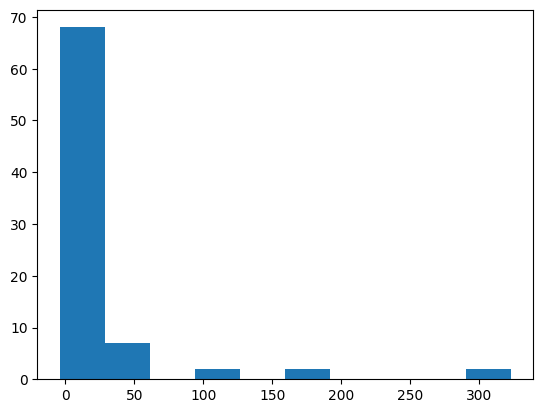

In [27]:
plt.hist(hv_bw_clean_df['bw_hv_date_diff_days'])

(array([72.,  3.,  2.,  0.,  0.,  2.,  0.,  0.,  0.,  2.]),
 array([  0. ,  32.3,  64.6,  96.9, 129.2, 161.5, 193.8, 226.1, 258.4,
        290.7, 323. ]),
 <BarContainer object of 10 artists>)

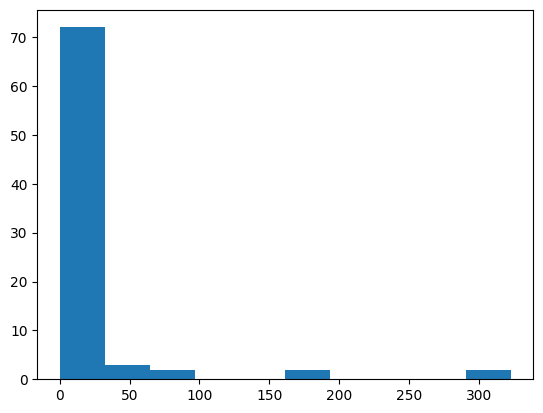

In [28]:
# absolute value 
hv_bw_clean_df['abs_bw_hv_date_diff_days'] = hv_bw_clean_df['bw_hv_date_diff_days'].abs()
plt.hist(hv_bw_clean_df['abs_bw_hv_date_diff_days'])

In [29]:
# median and IQR - not normally distributed 

hv_date_diff_df = pd.DataFrame(data = {"count_date_diff" : [hv_bw_clean_df['abs_bw_hv_date_diff_days'].count()], 
                                       "Median" : [hv_bw_clean_df['abs_bw_hv_date_diff_days'].median()], 
                                       "IQR" : [hv_bw_clean_df['abs_bw_hv_date_diff_days'].quantile(0.75) - hv_bw_clean_df['bw_hv_date_diff_days'].quantile(0.25)],
                                      'Minimum': [hv_bw_clean_df['abs_bw_hv_date_diff_days'].min()],
                                      'Maximum': [hv_bw_clean_df['abs_bw_hv_date_diff_days'].max()]})

hv_date_diff_df.to_csv(os.path.join(out_path, 'hv_abs_date_diff_df.csv'))
hv_date_diff_df

,count_date_diff,Median,IQR,Minimum,Maximum
0,81,2.0,8.0,0,323
